<a href="https://colab.research.google.com/github/rupalidawkoregithub/AirBnB_Data_Analysis---EDA-/blob/main/Rupali_Dawkore_Individual_AirBnB_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. 

## Explore and analyze the data to discover key understandings of the following important question to enhance bussiness of Airbnb
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Breakdown of this Notebook:**

1. Importing Libraries

2. Loading the dataset

3. Data Cleaning

4. Data Analysis and Visualization

# Questions By Rupali Dawkore

1. Listings distribution across latitude and longitude with different location and room types.

2. Relationship analysis or correlation between different variables.
3. Density and distribution of prices for each neighbourhood using central tendency.

**1.Importing Libraries**

In [1]:
# import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
# Mount google drive for access the dataset of Airbnb
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**2.Loading the dataset**


In [140]:
# File path of Airbnb dataset in google drive 
file_path = "/content/drive/MyDrive/AirBnB Booking Analysis Capstone Project 1 - EDA / Airbnb NYC 2019.csv"
df = pd.read_csv(file_path)

**Performing some basic analysis to get infromation about the data.**

In [141]:
# Complete Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [142]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [143]:
df.shape

(48895, 16)

In [144]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [145]:
df.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Examining categorical data**

In [146]:
df.neighbourhood_group.unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [147]:
len(df.neighbourhood.unique())

221

In [148]:
df.room_type.unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#Inference

1. we can observe that we have a good number of different data
types with a mix of categorical and numerical data. 
2. In total,there are 16 columns and 48895 rows which comprises simple information on which we can perform our in-depth analysis. 
3. We can also see from the above, there are some missing NaN values that will require cleaning and handling. 
4. We have a list of 5 categorical unique 'Neighbourhood_group' which are 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'. 
5. There are 221 categorical unique 'Neighbourhood' data. 
6. We have prominently 3 different room types('Private room','Shared room,      Entire home/apt.)

**3.Data Cleaning**

Cleaning the data for further predictive analysis.

1. Dropping columns that are not required and are insignificant for our analysis
   
2. Replace all the missing values with 0
3. Remove NaN values from the data

In [149]:
# Apply dropna() function to entire dataset and drop null values with dropna() function 
airBnB_df = df.dropna()

In [150]:
# Sum of null values in dataset
airBnB_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [151]:
# Information about our new non null dataframe
airBnB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [152]:
airBnB_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [153]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [154]:
airBnB_df.tail(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1



**4. Data Analysis and Visualization**


#**Answering Following Questions : (Rupali_Dawkore)**

**1. Listings distribution across latitude and longitude with different location and room type**




**Mapping neighbourhood group**

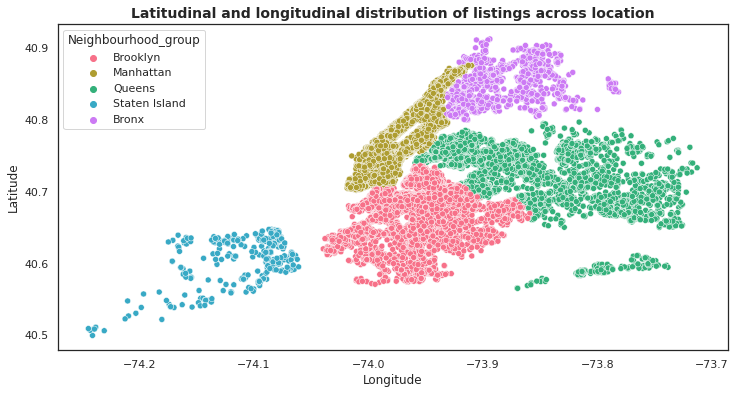

In [155]:
lat = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, palette="husl")

lat.set_title('Latitudinal and longitudinal distribution of listings across location', weight='bold', fontsize = 14)
lat.set_xlabel('Longitude')
lat.set_ylabel('Latitude')
lat.legend(loc='upper left', title='Neighbourhood_group')

**Mapping Room Types**

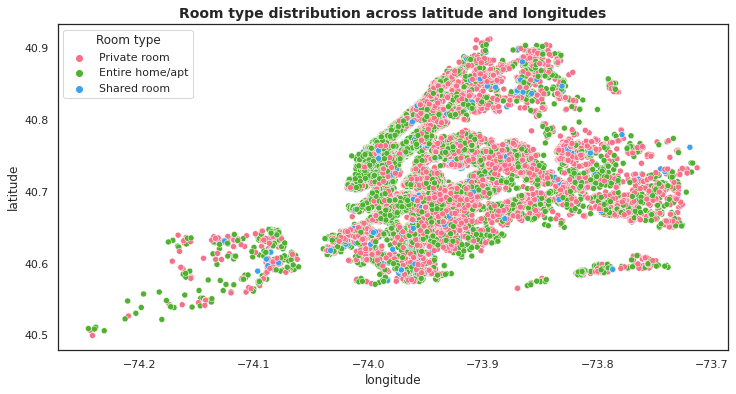

In [156]:
rm = sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.room_type, palette="husl")
rm.set_title('Room type distribution across latitude and longitudes', weight='bold', fontsize = 14)
rm.legend(loc='upper left', title='Room type')

**2.Relationship analysis or correlation between different variables**

In [157]:
# Requirement columns
airBnB_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [158]:
correlation = airBnB_df.corr()
correlation

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591480,-0.010085,0.103336,-0.006696,-0.073937,-0.330019,0.291786,0.098446,0.006624
host_id,0.591480,1.000000,0.012823,0.141276,0.006263,-0.051673,-0.141973,0.296274,0.149417,0.155361
latitude,-0.010085,0.012823,1.000000,0.088259,0.031344,0.024893,-0.008559,-0.010117,0.004340,-0.021921
longitude,0.103336,0.141276,0.088259,1.000000,-0.155298,-0.055414,0.054746,0.146228,-0.093348,0.102573
price,-0.006696,0.006263,0.031344,-0.155298,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,-0.073937,-0.051673,0.024893,-0.055414,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.330019,-0.141973,-0.008559,0.054746,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,0.291786,0.296274,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.098446,0.149417,0.004340,-0.093348,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.006624,0.155361,-0.021921,0.102573,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


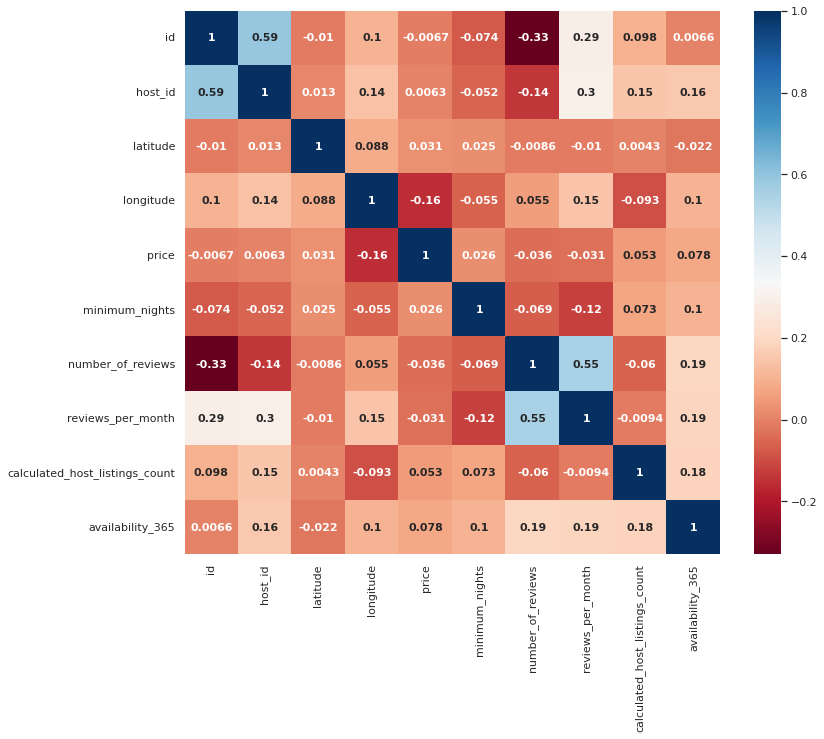

In [159]:
# Correlation or Relationship analysis between different variables in airbnb dataset.
plt.figure(figsize=(12,10))
# Draw the heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'},linewidths=0,cmap='RdBu')
plt.show()

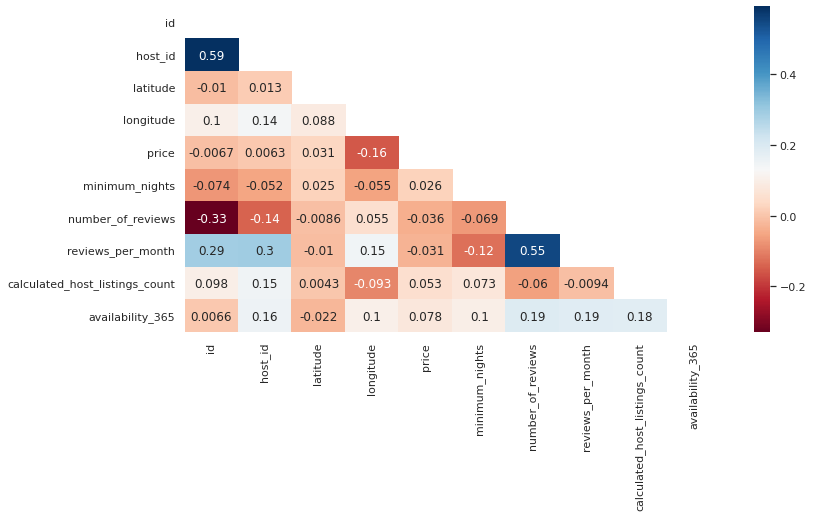

In [160]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Draw the heatmap
sns.heatmap(correlation, annot=True, mask = mask, cmap='RdBu')


**3.Density and distribution of prices for each neighbourhood using central tendency.**

In [161]:
price_var = airBnB_df.groupby(['neighbourhood_group']).agg({'price': ['median', 'mean','min', 'max']}) 
price_var.columns = ['median_price', 'mean_price', 'min_price', 'max_price']                    
price_var = price_var.reset_index()
price_var

,neighbourhood_group,median_price,mean_price,min_price,max_price
0,Bronx,65.0,79.558857,0,800
1,Brooklyn,94.0,121.463289,0,10000
2,Manhattan,140.0,180.071596,10,9999
3,Queens,72.0,95.783683,10,10000
4,Staten Island,75.0,89.964968,13,625


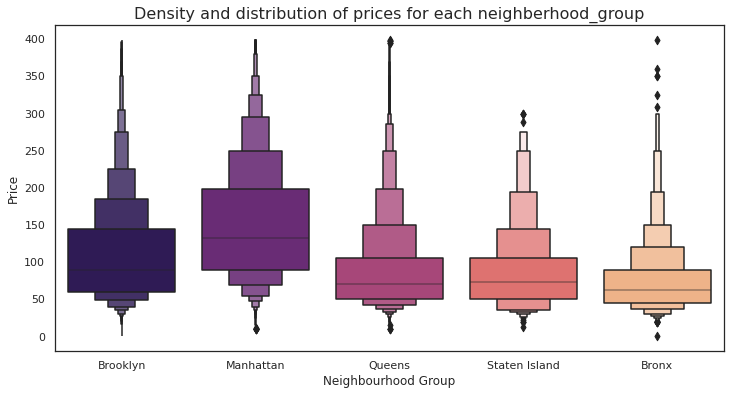

In [162]:
rev_price = airBnB_df[airBnB_df.price  < 400]

pv = sns.boxenplot(x='neighbourhood_group', y='price', data= rev_price , palette = 'magma')
pv.set_title('Density and distribution of prices for each neighberhood_group', fontsize = 16)
pv.set_ylabel('Price')
pv.set_xlabel('Neighbourhood Group')
sns.set(rc={'figure.figsize':(12,6)})
sns.set(style="white")

 # Questions By Team


1. What is the average preferred price on the Airbnb platform by the customers   on a particular location? 
2. Find top 10 hosts with most listings on the Airbnb platform?
3. Find total no. of nights spend per location by the customers?
4. What are the total of nights spends per room types by the customets?
5. Top 10 highest listing neighborhood on Airbnb platform?
6. What can we learn about different hosts and areas?
7. What can we learn from predictions? (ex: locations, prices, reviews, etc)
8. Which hosts are the busiest and why?
9. Is there any noticeable difference of traffic among different areas and what could be the reason for it?






**1.What is the average preferred price on the Airbnb platform by the customers on a particular location?**

In [ ]:
# Remove latitude, longitude, last_review and reviews_per_month columns from original dataset as there is no need of this data for our analysis 
airBnB_df.drop(airBnB_df.columns[[6,7,12,13]], axis=1, inplace=True)

In [164]:
airBnB_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              38821 non-null  int64 
 1   name                            38821 non-null  object
 2   host_id                         38821 non-null  int64 
 3   host_name                       38821 non-null  object
 4   neighbourhood_group             38821 non-null  object
 5   neighbourhood                   38821 non-null  object
 6   room_type                       38821 non-null  object
 7   price                           38821 non-null  int64 
 8   minimum_nights                  38821 non-null  int64 
 9   number_of_reviews               38821 non-null  int64 
 10  calculated_host_listings_count  38821 non-null  int64 
 11  availability_365                38821 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 3.9+ MB


In [165]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [166]:
# Let us create a dataframe which consists of only location .
location = pd.DataFrame(airBnB_df['neighbourhood_group'])
location


,neighbourhood_group
0,Brooklyn
1,Manhattan
3,Brooklyn
4,Manhattan
5,Manhattan
...,...
48782,Manhattan
48790,Queens
48799,Staten Island
48805,Bronx


In [167]:
# Average_price of property according to the location
Avg_preffered_price_df = airBnB_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
Avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,120.938312
1,Bronx,Private room,57.093511
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.281897
4,Brooklyn,Private room,73.349562
5,Brooklyn,Shared room,45.458621
6,Manhattan,Entire home/apt,230.200964
7,Manhattan,Private room,106.607488
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


In [168]:
# Unstack the group by information for plot the graph
Avg_preffered_price_df = airBnB_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
Avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,120.938312,57.093511,56.930233
Brooklyn,171.281897,73.349562,45.458621
Manhattan,230.200964,106.607488,77.980337
Queens,139.225603,69.302838,64.467105
Staten Island,125.366667,57.584906,57.600000


In [169]:
sort_room_type = airBnB_df.groupby(['neighbourhood_group','room_type'])['room_type'].count()
sort_room_type

neighbourhood_group  room_type      
Bronx                Entire home/apt     308
                     Private room        524
                     Shared room          43
Brooklyn             Entire home/apt    8159
                     Private room       7990
                     Shared room         290
Manhattan            Entire home/apt    9962
                     Private room       6303
                     Shared room         356
Queens               Entire home/apt    1742
                     Private room       2678
                     Shared room         152
Staten Island        Entire home/apt     150
                     Private room        159
                     Shared room           5
Name: room_type, dtype: int64

In [170]:
Avg_preffered_price_df.columns

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [171]:
Avg_preffered_price_df.index

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

<Figure size 1440x720 with 0 Axes>

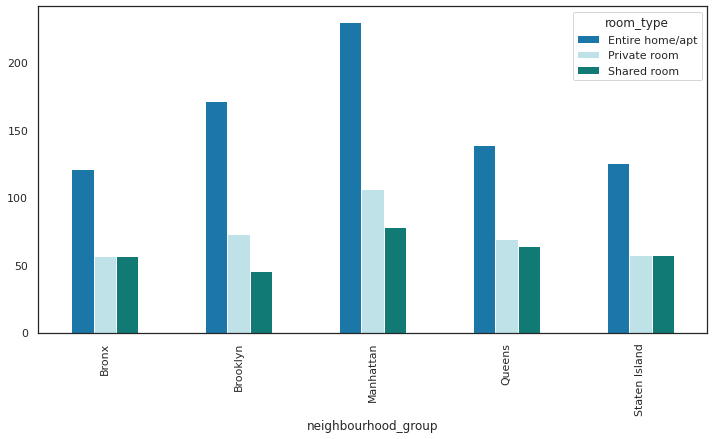

<Figure size 1440x720 with 0 Axes>

In [172]:
# Graph of average price of property according to location
Avg_preffered_price_df.plot.bar(color=['#1b77a8','#bee2e8','#117a75'])
plt.figure(figsize=(20,10))


 **Answer** : The average preferred price on the Airbnb platform 
              by the customers on a particular location and room_type.

              
            

**Bronx**           :      Entire home/apt      308,
                           Private room         524,
                           Shared room           43.

**Brooklyn**        :      Entire home/apt     8159,
                           Private room        7990,
                           Shared room          290.

**Manhattan**       :      Entire home/apt     9962,
                           Private room        6303,
                           Shared room          356.

**Queens**          :      Entire home/apt     1742,
                           Private room        2678,
                           Shared room          152.

**Staten Island**   :     Entire home/apt      150,
                          Private room         159,
                          Shared room            5.



**2. Find top 10 hosts with most listings on the Airbnb platform?**

In [174]:
airBnB_df['host_name'].count()

38821

In [175]:
airBnB_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,Entire home/apt,200,3,74,1,129


In [176]:
# Creating DataFrame
Count_host_name = list(airBnB_df['host_name'].value_counts())
Host_name = list(airBnB_df.host_name)
Listing_count= list(zip(Host_name,Count_host_name))
Count_host_id_df= pd.DataFrame(Listing_count)
Count_host_id_df.rename(columns={0:'Host_Name',1:'Counts'},inplace=True)

# Storing top 10 hosts with most listings
Top_host_id = Count_host_id_df.head(10)
Top_host_id

,Host_Name,Counts
0,John,335
1,Jennifer,309
2,LisaRoxanne,250
3,Laura,229
4,Chris,207
5,Garon,179
6,Shunichi,174
7,MaryEllen,170
8,Ben,170
9,Lena,159


[Text(0, 0, 'John'),
 Text(0, 0, 'Jennifer'),
 Text(0, 0, 'LisaRoxanne'),
 Text(0, 0, 'Laura'),
 Text(0, 0, 'Chris'),
 Text(0, 0, 'Garon'),
 Text(0, 0, 'Shunichi'),
 Text(0, 0, 'MaryEllen'),
 Text(0, 0, 'Ben'),
 Text(0, 0, 'Lena')]

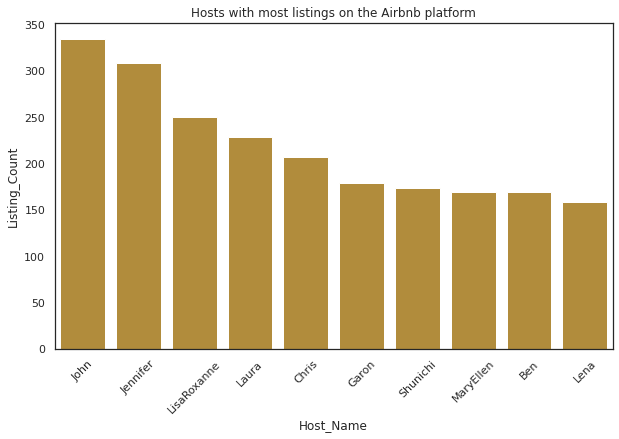

In [177]:
# Setting the figure size
sns.set(rc={'figure.figsize':(10,6)})
# Setting background colour of chart as white
sns.set_style('white')
# Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Name', y= 'Counts', color='#c49329', data=Top_host_id,
                      order=Top_host_id.sort_values('Counts',ascending = False).Host_Name)
# Setting font size for title
sns.set(font_scale = 1)
# Naming the Chart
viz_bar.set_title('Hosts with most listings on the Airbnb platform')
# Naming X & Y axis
viz_bar.set_xlabel('Host_Name')
viz_bar.set_ylabel('Listing_Count')
# Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


**3.Find total no. of nights spend per location by the customers?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
#  find the total no.of nights
Total_minimum_nights = pd.DataFrame(airBnB_df['minimum_nights']).sum()
Total_minimum_nights


minimum_nights    342614
dtype: int64

In [ ]:
Total_no_of_nights_spend = airBnB_df.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
Total_no_of_nights_spend.sort_values('minimum_nights',ascending=True)

,neighbourhood_group,minimum_nights
4,Staten Island,1802
0,Bronx,4971
3,Queens,29356
1,Brooklyn,121693
2,Manhattan,184792


[Text(0, 0, 'Bronx'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Staten Island')]

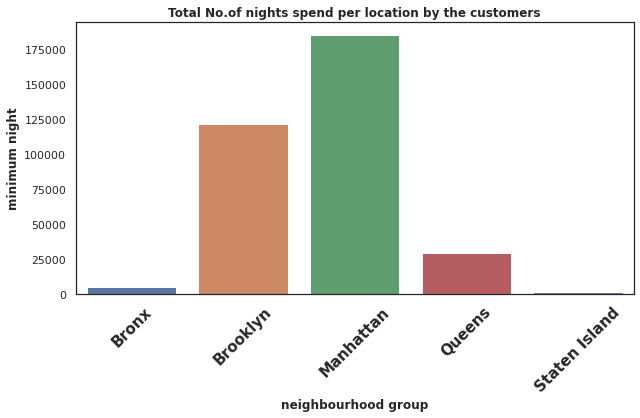

In [ ]:
from matplotlib import colors
from seaborn.widgets import color_palette
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = Total_no_of_nights_spend)
abc.set_title('Total No.of nights spend per location by the customers', Weight='bold')
abc.set_ylabel('minimum night', Weight='bold')
abc.set_xlabel('neighbourhood group', Weight='bold')
abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')

**4.What are the total of nights spends per room types by the customers?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
Total_no_of_nights_spend_per_room = airBnB_df.groupby('room_type')['minimum_nights'].sum().reset_index()
Total_no_of_nights_spend_per_room

,room_type,minimum_nights
0,Entire home/apt,215081
1,Private room,120023
2,Shared room,7510


In [ ]:
# create dataset
labels = list(Total_no_of_nights_spend_per_room['room_type'])
values = list(Total_no_of_nights_spend_per_room['minimum_nights'])
# create color parameter
colors = ['#1d67c2','#5176b5','yellow']

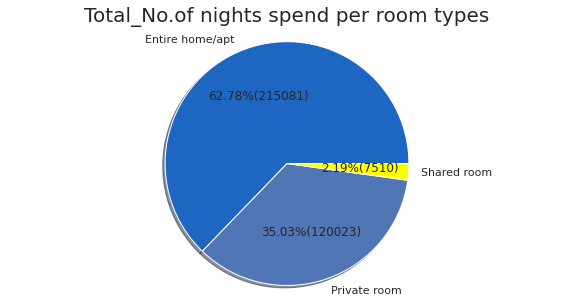

In [ ]:
# creating pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(values,labels=labels,colors=colors,autopct=make_autopct(values),shadow=True)
plt.title('Total_No.of nights spend per room types',fontsize=20)

plt.axis("equal")  
plt.show()

**5.Top 10 highest listing neighborhood on Airbnb platform?**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
Top_10_neighbourhood = airBnB_df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
Top_10_neighbourhood


,index,neighbourhood
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


In [ ]:
# Make a copy of top 10 neighbourhood 
Highest_listing_count = Top_10_neighbourhood.copy()
Highest_listing_count.rename(columns={'index':'neighourhood','neighbourhood':'Highest_listing_value'},inplace=True)
var = Highest_listing_count[:10]
var

,neighourhood,Highest_listing_value
0,Williamsburg,3917
1,Bedford-Stuyvesant,3713
2,Harlem,2655
3,Bushwick,2462
4,Upper West Side,1969
5,Hell's Kitchen,1954
6,East Village,1852
7,Upper East Side,1797
8,Crown Heights,1563
9,Midtown,1545


Text(0.5, 0, 'neighborhood')

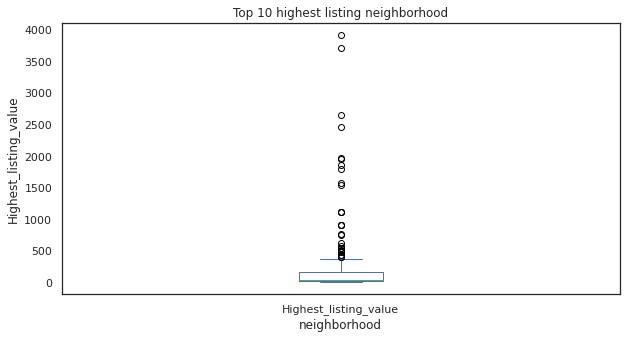

In [ ]:
# Create the plot object
plt.rcParams['figure.figsize'] = (10, 5)
Highest_listing_count.plot(kind="box")
#Highest_listing_count.plot()
plt.title('Top 10 highest listing neighborhood')
plt.ylabel('Highest_listing_value')
plt.xlabel('neighborhood')



***6. What can we learn about different hosts and areas?***


In [ ]:
airBnB_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355


In [ ]:
# Here we will find out the total number of host id present in our dataset .
Total_no_of_host_id = pd.DataFrame(airBnB_df['host_id']).count()
Total_no_of_host_id

host_id    48858
dtype: int64

There are Total_no_of_host_id  **48858** in the dataset we identified.

In [ ]:
# Here we will find out the total number of host name present in our dataset .
Total_no_of_host_name = pd.DataFrame(airBnB_df['host_name']).count()
Total_no_of_host_name

host_name    48858
dtype: int64

There are Total_no_of_host_name  **48858** in the dataset we identified.

In [ ]:
# Here we will find out the total number of unique hosts present in our dataset .
Total_unique_host_name = pd.DataFrame(airBnB_df['host_name']).nunique()
Total_unique_host_name

host_name    11450
dtype: int64

There are Total_unique_host_name  **11450** in the dataset we identified.

In [ ]:
# Here we will find out the total number of unique hosts id present in our dataset .
Total_unique_host_id = pd.DataFrame(airBnB_df['host_id']).nunique()
Total_unique_host_id

host_id    37425
dtype: int64

There are Total_unique_host_id   **37425**  in the dataset we identified.

In [ ]:
# Here we will find out the different area and host name present in our dataset and their listings counts.
Different_host_area=airBnB_df.groupby(['host_name','neighbourhood'])['calculated_host_listings_count'].count().reset_index()
Different_host_area.sort_values('calculated_host_listings_count',ascending=False)


,host_name,neighbourhood,calculated_host_listings_count
25257,Sonder (NYC),Financial District,218
13235,John,Hell's Kitchen,55
27576,Vida,Greenpoint,52
25252,Sonder,Financial District,51
25464,Stanley,Murray Hill,50
...,...,...,...
11063,Ilse,West Village,1
11062,Ilsa,Prospect Heights,1
11060,Ilona,South Slope,1
11059,Ilona,Sheepshead Bay,1


In [ ]:
Areas = airBnB_df.neighbourhood.unique()
Areas[:10]

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown'], dtype=object)

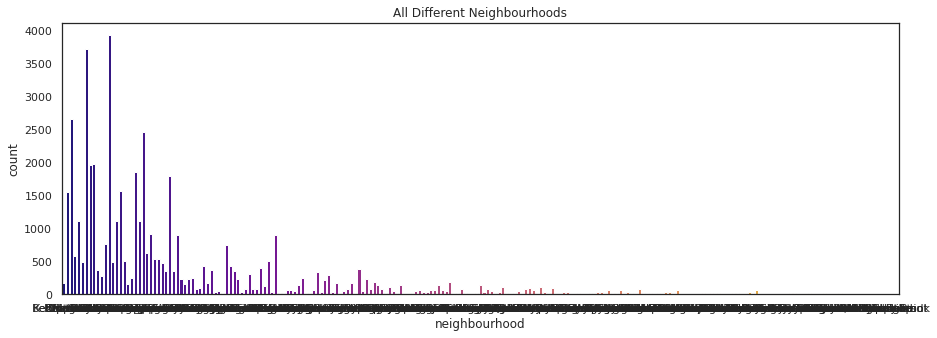

In [ ]:
# All Different Areas
sns.countplot(x = airBnB_df['neighbourhood'], palette="plasma",orient='h',saturation=0.75)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title('All Different Neighbourhoods')
#plt.xlabel('Areas')
plt.show()

**7.What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [ ]:
airBnB_df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365


In [ ]:
# Here we are trying to find out the mean price for the different location and doing ploting for same.
Area_group = airBnB_df.groupby(['neighbourhood_group'])
Area_group

In [ ]:
Area_group.mean()['price'].sort_values(ascending = False)

neighbourhood_group
Manhattan        196.897473
Brooklyn         124.410523
Staten Island    114.812332
Queens            99.536017
Bronx             87.469238
Name: price, dtype: float64

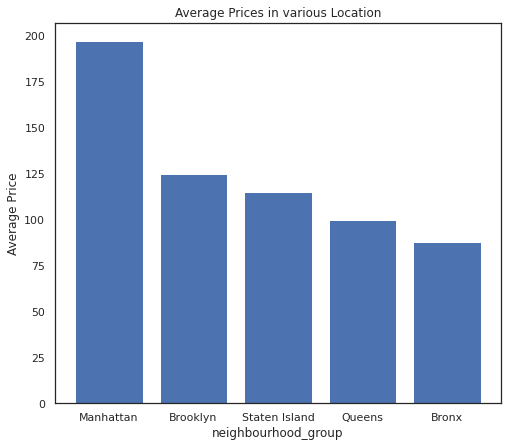

In [ ]:
# Let us plot a Bar Graph for the mean prices of all neighbourgood_group
plt.figure(figsize=(8,7))
plt.bar(Area_group.mean()['price'].sort_values(ascending = False).keys(),Area_group.mean()['price'].sort_values(ascending = False))
plt.title('Average Prices in various Location')
plt.xlabel("neighbourhood_group")
plt.ylabel('Average Price')
plt.show()

In [ ]:
Room_type_group =airBnB_df.groupby(['room_type'])
Room_type_group.mean()['price'].sort_values(ascending=False)


room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64

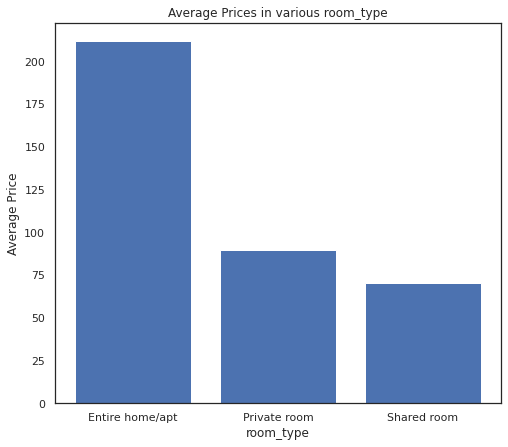

In [ ]:
# Let us plot a Bar Graph for the mean prices of all neighbourgood_group
plt.figure(figsize=(8,7))
plt.bar(Room_type_group.mean()['price'].sort_values(ascending = False).keys(),Room_type_group.mean()['price'].sort_values(ascending = False))
plt.title('Average Prices in various room_type')
plt.xlabel("room_type")
plt.ylabel('Average Price')
plt.show()

In [ ]:
# LET US PLOT THE GRAPH FOR NUMBER OF REVIEW VS BOOKING_ID COUNT
Review_counts = airBnB_df.groupby(['number_of_reviews'])['id'].count() 
Review_counts.sort_values(ascending= False)[0:11]

number_of_reviews
0     10037
1      5239
2      3464
3      2519
4      1994
5      1615
6      1356
7      1179
8      1127
9       964
10      803
Name: id, dtype: int64

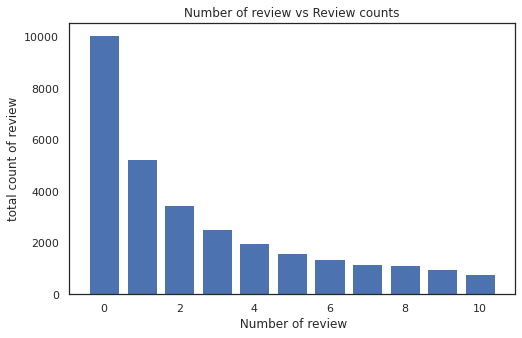

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(Review_counts.sort_values(ascending= False)[0:11].keys(),Review_counts.sort_values(ascending= False)[0:11])
plt.title('Number of review vs Review counts')
plt.xlabel(" Number of review")
plt.ylabel('total count of review')
plt.show()


**8.Which hosts are the busiest and why?**

In [ ]:
#LETS FIND THE UNIQUE HOST IN OUR DATASET
uniq_host = pd.DataFrame(airBnB_df['host_name'].unique(),columns = ['host_name'])
uniq_host


,host_name
0,John
1,Jennifer
2,Elisabeth
3,LisaRoxanne
4,Laura
...,...
11445,Molo
11446,Qizhi
11447,Abayomi
11448,Alberth


**We can see that there are 11450 rows of the data frame, with this we can say that there are 11450 unique hosts in our data set.**

In [ ]:
#WE CAN FIND THE BUISEST HOST BY CALCULATING NUMBER OF REVIEWS THE HOST IS GETTING

review_count = airBnB_df.groupby(['host_name','room_type'])['number_of_reviews'].max().reset_index()
review_count.sort_values(by = 'number_of_reviews', ascending=False)
review_count10 = review_count.sort_values(by = 'number_of_reviews', ascending=False).head(10)
review_count10

,host_name,room_type,number_of_reviews
3434,Dona,Private room,629
6332,Jj,Private room,607
8977,Maya,Private room,543
2164,Carol,Private room,540
2975,Danielle,Private room,510
1214,Asa,Entire home/apt,488
13839,Wanda,Private room,480
7902,Linda,Private room,474
2947,Dani,Entire home/apt,467
863,Angela,Private room,466



**From the above analysis it is clear that few of the top busiest host are Dona,Jj,Maya,Carol,Danielle and Asa.** 

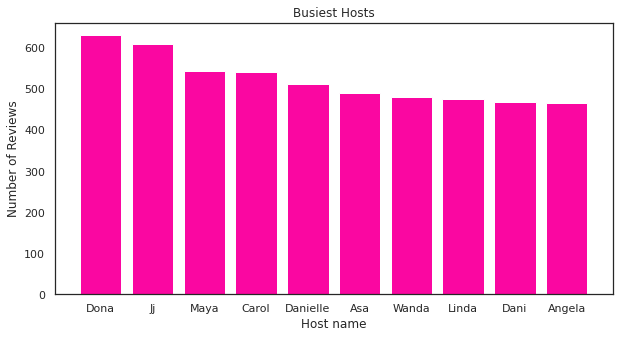

In [ ]:
#NOW LETS PLOT A GRAPH FOR A PICTORIAL REPRESENTATION THE DATA
host_name = review_count10['host_name']
revw = review_count10['number_of_reviews']
plt.bar(host_name,revw,color = '#fa07a1')
plt.xlabel("Host name")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()


***From the above graph we can say that the busiest host are:

**Dona , Jj, Maya , Carol and Danielle**

According to their reviews count. These host are having more rewiews because they have a listing of private rooms and entire apartment and people use stay more in private rooms and apartment ***

**9.Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [ ]:
#WE CAN FIND THE TRAFFIC OF THE AREA BY CALCULATING MINIMUM NIGHTS SPEND BY THE PEOPLE IN THE PARTICULAR AREA

nights_count = airBnB_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
area_traffic = nights_count.sort_values(by = 'minimum_nights',ascending = False)
area_traffic

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13190
4,Brooklyn,Private room,10123
3,Brooklyn,Entire home/apt,9553
7,Manhattan,Private room,7973
10,Queens,Private room,3370
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,378


From the above analysis we can see that the minimum nights spent by the people are in Manhattan in entire home/apartment.We can also say that

1. Manhattan
2. Brooklyn
3. Queens

Have the huge traffic because people prefer more to stay in private room and  entire home/apartment.We can clearly see that these neighbourhood are proving more private rooms and entire home/apartment.

Text(0.5, 1.0, 'Traffic of area according to minimum nights')

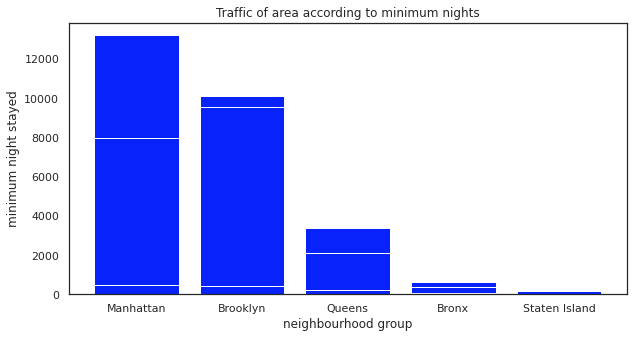

In [ ]:
#NOW LETS PLOT THE GRAPH OF ABOVE ANALYSIS FOR THE PICTORICAL REPRESENTATION OF THE ANALYSIS
area = area_traffic['neighbourhood_group']
stay = area_traffic['minimum_nights']
plt.bar(area,stay,color = '#0723fa')
plt.xlabel('neighbourhood group')
plt.ylabel('minimum night stayed')
plt.title('Traffic of area according to minimum nights')



# **Limitations**



✔ Dataset features in terms of modern world, are of very poor quality in deciding the valuation of a property

✔ User ratings of hosts aren’t available, it would’ve been better to rank our hosts based on user satisfaction and ratings. Normally a low rated property tends to lower their price.

✔ In order to have a better analysis regarding the quality of the properties, it would be interesting if we had an analysis of sentiments with property valuations.

✔ The exact number of guests count also missing



# **Scope of Improvement**


✔ As dataset has few qualifying attributes to value a property, more features can be added like bedroom, bathroom, property age (it might be one of the most important one), applicable tax rate, distance to nearest airport, hospital or schools.


✔ In presence of ratings, hosts can be classified and ranked, special discount or offer can be given to highest rated hosts following marketing strategy


 ✔ Time series analysis can be done to make prediction on occupancy rate based on tourist season.





# **Conclusion** 


✔ Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY


✔ Most visitors don’t prefer shared rooms, they tend to visit private room or entire home.


✔ Some properties are having Minimum Nights to stay is more than 365 Days which can be favorable among Students, Low-Income Employees & Immigrants.

✔  Though location of property has high relation on deciding its price, but a property in popular location doesn’t mean it will stay occupied in most of the time.





